In [4]:
# !pip install seaborn 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv("medical_examination.csv")

In [7]:
df['overweight'] = np.where( (df['weight']/((df['height'] / 100) ** 2)) > 25 , 1, 0 )

In [8]:
print(df['cholesterol'].value_counts())
print(df['gluc'].value_counts())


cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64


In [9]:
df['cholesterol'] = np.where(df['cholesterol']>1, 1, 0)
df['gluc'] = np.where(df['gluc']>1, 1, 0)

In [10]:
df['cholesterol'].value_counts()
df['gluc'].value_counts()

gluc
0    59479
1    10521
Name: count, dtype: int64

In [11]:
def draw_cat_plot(df):
    df_cat = df[['age', 'cholesterol']]  # Ensure 'age' and 'cholesterol' are correct column names
    fig = sns.catplot(x="age", hue="cholesterol", data=df_cat, kind='box')  # Use 'age' not 'Age'
    
    # Set axis labels and title
    fig.set_axis_labels('Age', 'Cholesterol')
    fig.fig.suptitle('Age VS Cholesterol')
    
    # Save the plot
    fig.savefig('catplot.png')
    
    # Show the plot
    plt.show()

    return fig


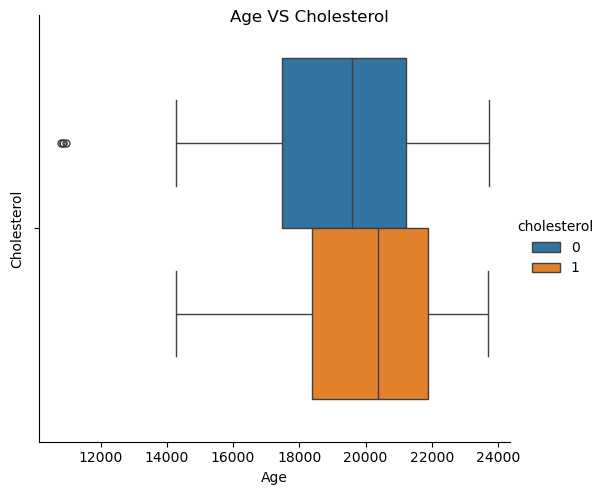

In [12]:
draw_cat_plot(df)

In [13]:
df_cat = pd.melt(df,id_vars=df.columns[:6] ,value_vars = ['cholesterol', 'gluc','smoke','alco','active', 'overweight'], var_name='Indicator', value_name= 'value')

In [14]:
# df = your_dataframe

# Melt the dataframe to have all the features you want to plot as one column
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group the data by 'cardio' and count occurrences of each feature
df_cat_grouped = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')

# Rename the 'value' column to 'feature_value' to avoid conflicts for catplot
df_cat_grouped = df_cat_grouped.rename(columns={'value': 'feature_value'})

# Show the resulting DataFrame
print(df_cat_grouped)

    cardio     variable  feature_value  count
0        0       active              0   6378
1        0       active              1  28643
2        0         alco              0  33080
3        0         alco              1   1941
4        0  cholesterol              0  29330
5        0  cholesterol              1   5691
6        0         gluc              0  30894
7        0         gluc              1   4127
8        0   overweight              0  15915
9        0   overweight              1  19106
10       0        smoke              0  31781
11       0        smoke              1   3240
12       1       active              0   7361
13       1       active              1  27618
14       1         alco              0  33156
15       1         alco              1   1823
16       1  cholesterol              0  23055
17       1  cholesterol              1  11924
18       1         gluc              0  28585
19       1         gluc              1   6394
20       1   overweight           

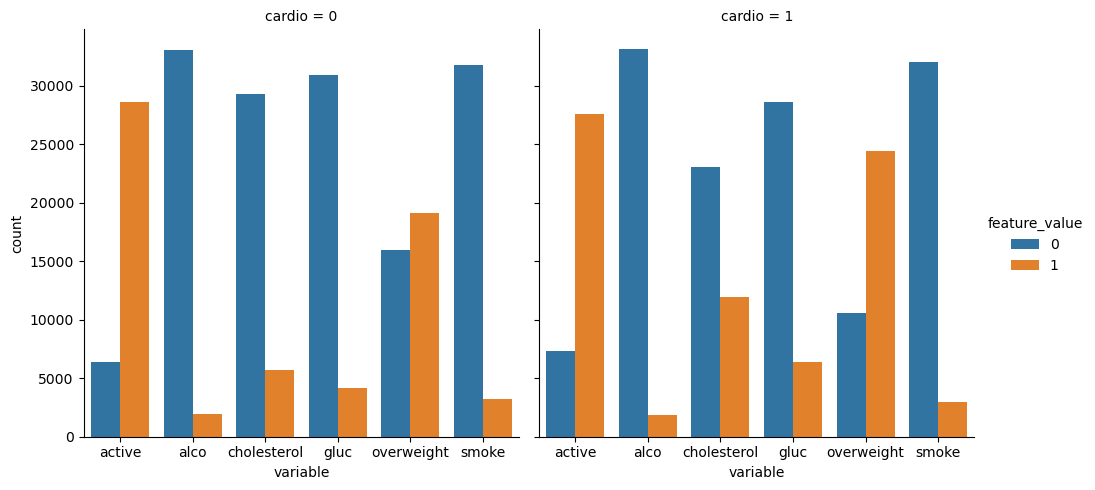

In [15]:
fig1 = sns.catplot(x='variable', y='count', hue='feature_value', data=df_cat_grouped, kind='bar', col='cardio')
fig=fig1.fig

In [16]:
corr = df.corr()

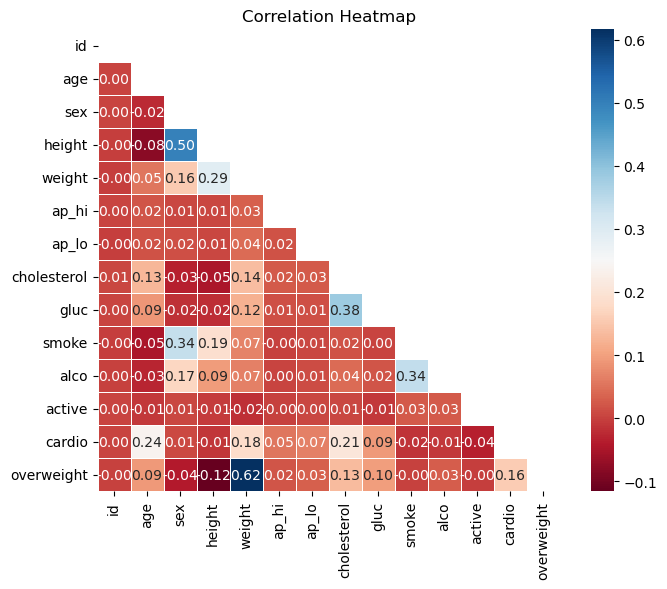

In [17]:
def draw_heat_map(corr):
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu', square=True, mask=mask, cbar=True, linewidths=0.5, linecolor='white')
    plt.title("Correlation Heatmap")
    plt.show()

draw_heat_map(corr)

In [26]:
(df['ap_lo'] > df['ap_hi'] ).sum()

1234

In [19]:

# 1. Filter out rows where diastolic pressure is higher than systolic
df_heat = df[df['ap_lo'] <= df['ap_hi']]

# 2. Filter out rows where height is less than the 2.5th percentile or more than the 97.5th percentile
height_lower = df_heat['height'].quantile(0.025)
height_upper = df_heat['height'].quantile(0.975)
df_heat = df_heat[(df_heat['height'] >= height_lower) & (df_heat['height'] <= height_upper)]

# 3. Filter out rows where weight is less than the 2.5th percentile or more than the 97.5th percentile
weight_lower = df_heat['weight'].quantile(0.025)
weight_upper = df_heat['weight'].quantile(0.975)
df_heat = df_heat[(df_heat['weight'] >= weight_lower) & (df_heat['weight'] <= weight_upper)]

# The df_heat is now cleaned with the specified conditions


In [21]:
(df_heat['ap_lo'] > df_heat['ap_hi'] ).sum()

0

                            Thank You
